<a href="https://colab.research.google.com/github/gunduzl/assistantCreator/blob/main/CSE464_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-9-79c2251ee2e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='viridis')


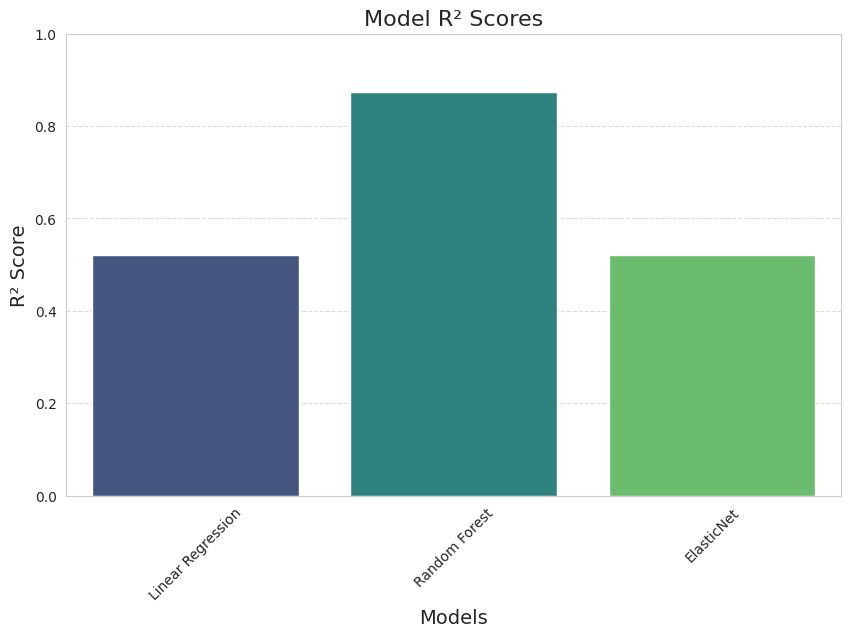

R² Scores for Each Model:
Linear Regression: 0.5205
Random Forest: 0.8740
ElasticNet: 0.5207


In [ ]:
# Step 6: Visualize R² Scores as a Histogram
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Random Forest', 'ElasticNet']
r2_scores = [r2_lr, r2_rf, r2_en]

sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.title("Model R² Scores", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("R² Score", fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print R² Scores for each model
print("R² Scores for Each Model:")
for model, r2 in zip(models, r2_scores):
    print(f"{model}: {r2:.4f}")


<ipython-input-12-e9b7f172b0cd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-12-e9b7f172b0cd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month_name()  # Extract month names
<ipython-input-12-e9b7f172b0cd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

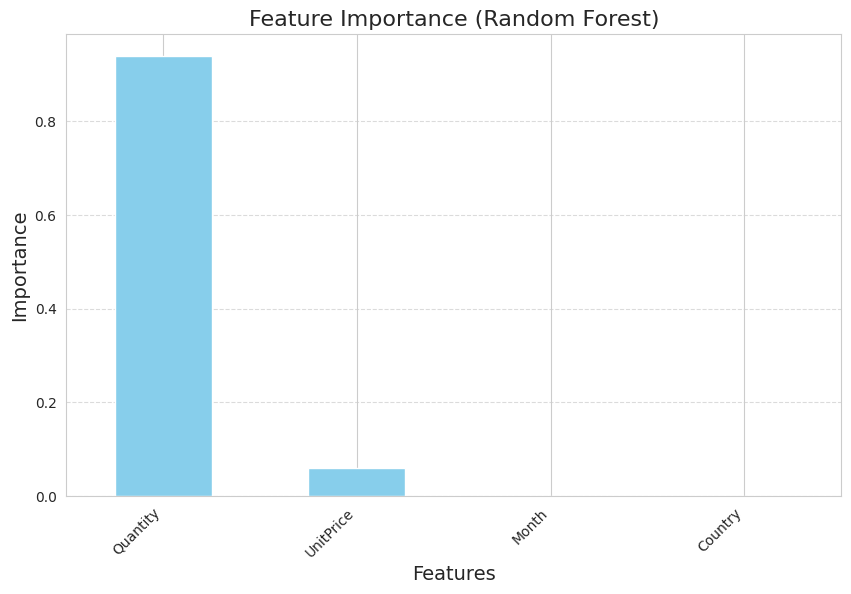

Feature Importance Values (Random Forest):
Quantity     0.939365
UnitPrice    0.059513
Month        0.000821
Country      0.000300
dtype: float64


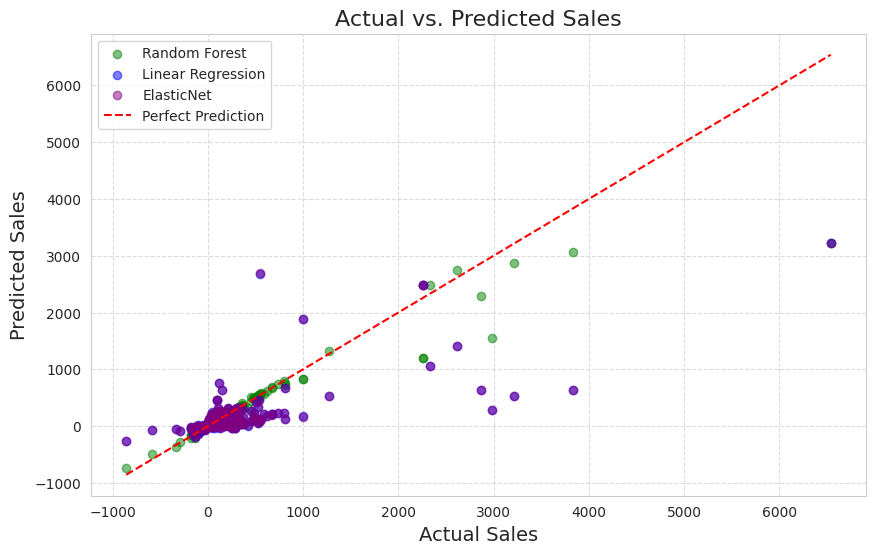

Actual vs. Predicted Sales Table:
       Actual Sales  Predicted Sales (Random Forest)  \
41281         19.80                            19.80   
58269          2.10                             2.10   
54225         50.88                            50.88   
71000          4.25                             4.25   
56884         19.50                            19.50   
64858          2.55                             2.55   
36180         19.80                            19.80   
45569         15.60                            15.60   
74631         34.00                            34.00   
25458          3.48                             3.48   

       Predicted Sales (Linear Regression)  Predicted Sales (ElasticNet)  
41281                            12.152560                     12.322683  
58269                             9.309631                      9.647792  
54225                            58.197258                     58.535218  
71000                             8.627546       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Online Retail dataset
file_path = "Online_Retail.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna(subset=['CustomerID', 'Description'])

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create derived features
df['Month'] = df['InvoiceDate'].dt.month_name()  # Extract month names
df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Calculate revenue

# Encode categorical variables
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Define features and target
X = df[['Quantity', 'UnitPrice'] + list(df.filter(like='Country_').columns)]
X['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month  # Use numeric month for modeling
y = df['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Development
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ElasticNet Regression
en = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
en.fit(X_train, y_train)
y_pred_en = en.predict(X_test)

# Step 3: Model Evaluation
# Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Regression
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# ElasticNet Regression
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
r2_en = r2_score(y_test, y_pred_en)

# Step 4: Visualizations and Tables
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# 1. Feature Importance Plot (Random Forest)
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
# Combine all country-related features into a single "Country" feature
feature_importances['Country'] = feature_importances.filter(like='Country_').sum()
feature_importances = feature_importances.drop(feature_importances.filter(like='Country_').index)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print feature importance values
print("Feature Importance Values (Random Forest):")
print(feature_importances.sort_values(ascending=False))

# 2. Actual vs. Predicted Sales Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Random Forest')
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_en, alpha=0.5, color='purple', label='ElasticNet')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Sales", fontsize=14)
plt.ylabel("Predicted Sales", fontsize=14)
plt.title("Actual vs. Predicted Sales", fontsize=16)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# 3. Actual vs. Predicted Sales Table
results_df = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales (Random Forest)': y_pred_rf,
    'Predicted Sales (Linear Regression)': y_pred_lr,
    'Predicted Sales (ElasticNet)': y_pred_en
})
print("Actual vs. Predicted Sales Table:")
print(results_df.head(10))

# Step 5: Model Performance Comparison Table
performance_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'ElasticNet'],
    'RMSE': [rmse_lr, rmse_rf, rmse_en],
    'R²': [r2_lr, r2_rf, r2_en]
})
print("\nModel Performance Comparison Table:")
print(performance_df)


Initial Dataset Shape: (342983, 8)
After Cleaning Shape: (249983, 8)
Arithmetic Mean of Revenue: 21.180270306380834
Median of Revenue: 12.5
Mode of Revenue: 15.0
Skewness of Revenue: 0.09174954352612821
Kurtosis of Revenue: 68691.01783413168
Range of Revenue: 154367.2
Variance of Revenue: 66358.83933252413
Standard Deviation of Revenue: 257.6020949692066
Interquartile Range of Revenue: 14.849999999999998


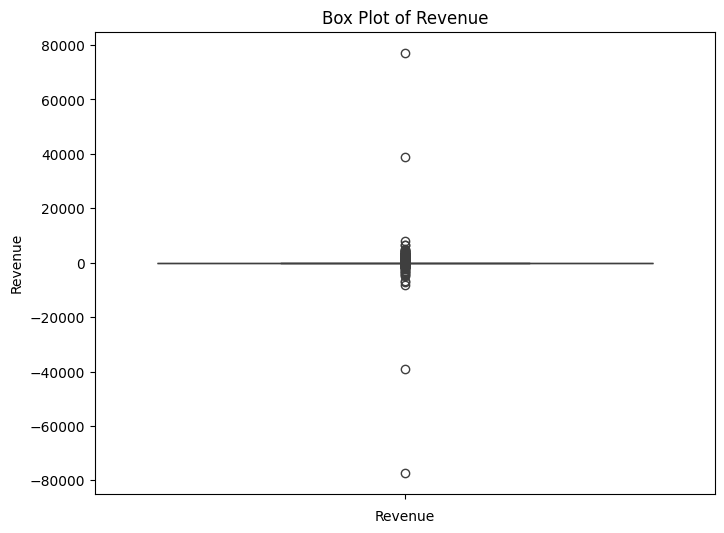

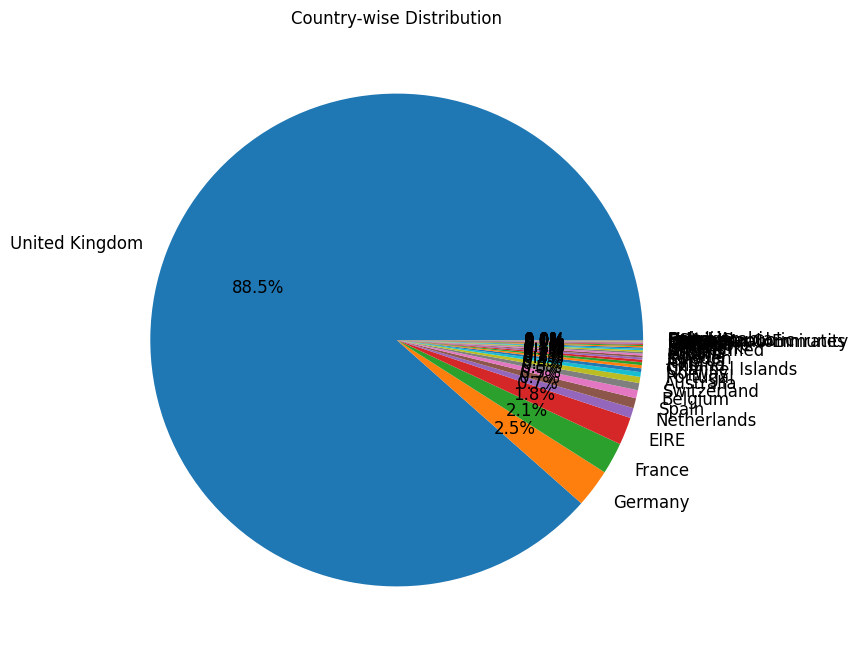

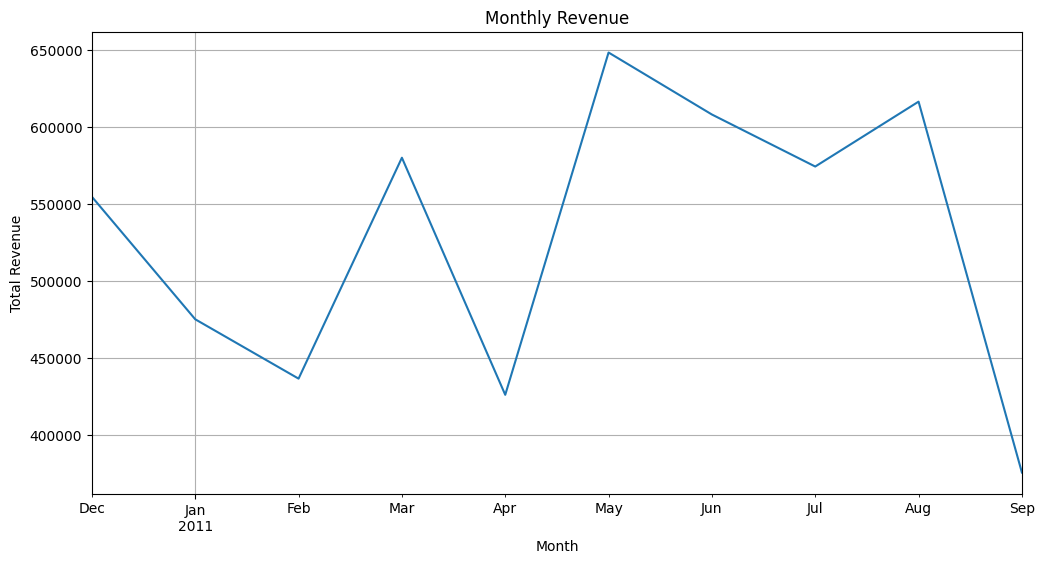

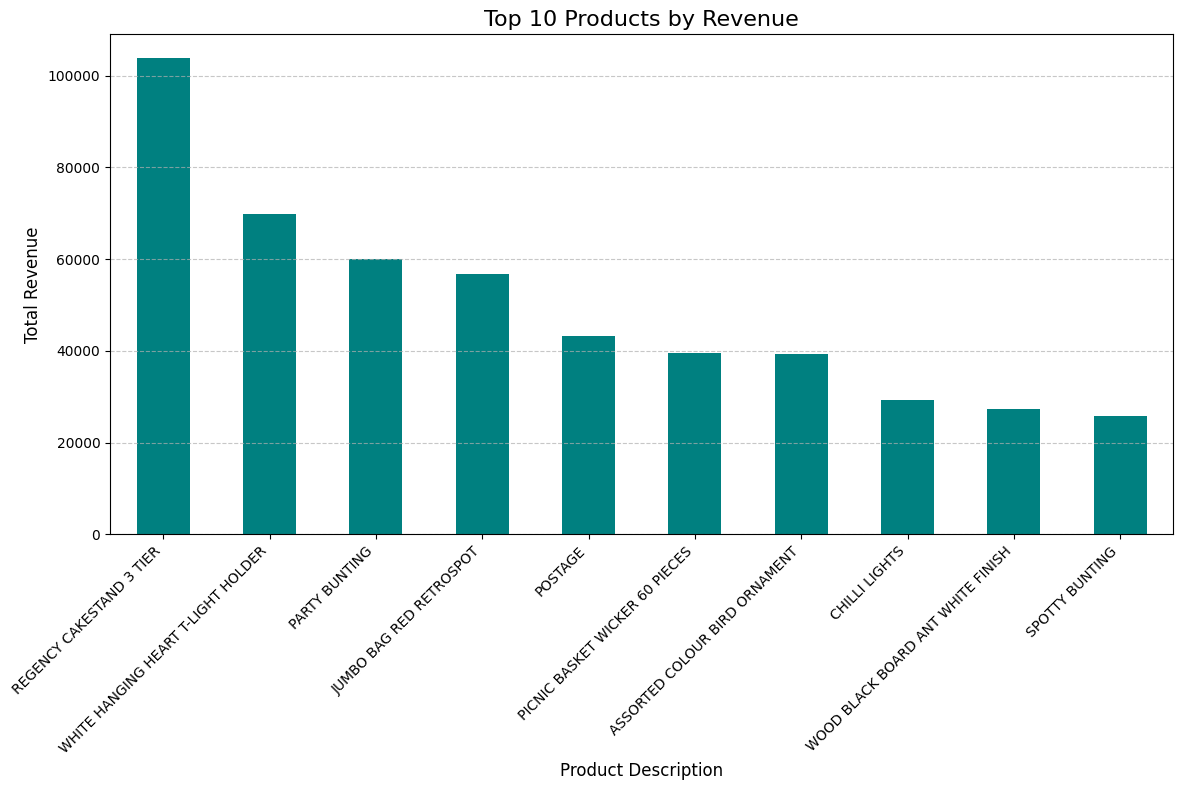

In [ ]:
# Descriptive-Analytical

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Online Retail dataset
file_path = "Online_Retail.csv"  # Update with your actual file path
data = pd.read_csv(file_path)

# Data Cleaning
print("Initial Dataset Shape:", data.shape)
data.dropna(inplace=True)  # Remove missing values
print("After Cleaning Shape:", data.shape)


# Calculate Revenue
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Descriptive Statistics
print("Arithmetic Mean of Revenue:", data['Revenue'].mean())
print("Median of Revenue:", data['Revenue'].median())
print("Mode of Revenue:", data['Revenue'].mode()[0])
print("Skewness of Revenue:", data['Revenue'].skew())
print("Kurtosis of Revenue:", data['Revenue'].kurt())

# Measures of Dispersion
print("Range of Revenue:", data['Revenue'].max() - data['Revenue'].min())
print("Variance of Revenue:", data['Revenue'].var())
print("Standard Deviation of Revenue:", data['Revenue'].std())
Q1 = data['Revenue'].quantile(0.25)
Q3 = data['Revenue'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range of Revenue:", IQR)

# Visualizations
## Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data['Revenue'])
plt.title('Box Plot of Revenue')
plt.xlabel('Revenue')
plt.show()

## Pie Chart: Country-wise Distribution
plt.figure(figsize=(8, 6))
segments = data['Country'].value_counts()
segments.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Country-wise Distribution', fontsize=12)
plt.ylabel('')
plt.show()

## Line Chart: Monthly Revenue
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Ensure InvoiceDate is datetime
monthly_revenue = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', title='Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

# Group data by 'Description' and calculate total revenue for each product
description_revenue = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

# Plot the top 10 products by revenue
plt.figure(figsize=(12, 8))
description_revenue.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Selected Features: ['Revenue', 'Frequency']
Mean Absolute Error: 1572.6661
Mean Squared Error: 1465663238.9468
R² Score: 0.2189


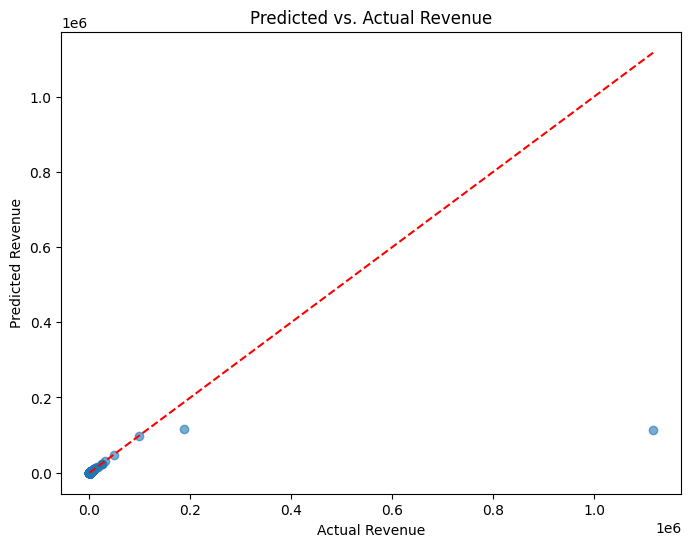

In [ ]:
# Predictive Analytical with Advanced Feature Selection

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load your Online Retail dataset
file_path = "Online_Retail.csv"  # Update with your actual file path
data = pd.read_csv(file_path)

# Handle missing values
data.fillna({'Quantity': 0, 'UnitPrice': 0, 'CustomerID': 0, 'InvoiceDate': '0'}, inplace=True)

# Adjust the InvoiceDate column to datetime and calculate TotalPrice
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M', errors='coerce')
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Remove rows where TotalPrice is zero or negative
data = data[data['TotalPrice'] > 0].copy()  # Ensure it's a copy

# Feature engineering: Create features like Month, Day, Weekday
data.loc[:, 'Month'] = data['InvoiceDate'].dt.month
data.loc[:, 'Day'] = data['InvoiceDate'].dt.day
data.loc[:, 'Weekday'] = data['InvoiceDate'].dt.weekday

# Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'TotalPrice': 'sum',  # Total spending by the customer
    'InvoiceNo': 'count',  # Number of transactions
    'Month': 'mean',  # Average month of purchase
    'Weekday': 'mean'  # Average weekday of purchase
}).reset_index()

# Rename columns for better clarity
customer_data.columns = ['CustomerID', 'Revenue', 'Frequency', 'AverageMonth', 'AverageWeekday']

# Remove customers with no purchases
customer_data = customer_data[customer_data['Revenue'] > 0]

# Classification: Create RevenueCategory (target)
bins = [0, 50, 200, customer_data['Revenue'].max()]
labels = ['Low', 'Medium', 'High']
customer_data['RevenueCategory'] = pd.cut(customer_data['Revenue'], bins=bins, labels=labels)

# Feature set for Regression
X = customer_data[['Revenue', 'Frequency', 'AverageMonth', 'AverageWeekday']]
y = customer_data['Revenue']  # Target variable for regression

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ElasticNet with cross-validation for feature selection
elastic_net = ElasticNetCV(cv=5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# Select features based on ElasticNet coefficients
selected_features = SelectFromModel(elastic_net, prefit=True)
X_train_selected = selected_features.transform(X_train_scaled)
X_test_selected = selected_features.transform(X_test_scaled)

# Get selected feature names
selected_feature_names = X.columns[selected_features.get_support()]
print("Selected Features:", selected_feature_names.tolist())

# Train Random Forest Regressor with selected features
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_selected, y_train)

# Predict and Evaluate Regression
y_pred = rf_regressor.predict(X_test_selected)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Predicted vs. Actual Revenue')
plt.show()


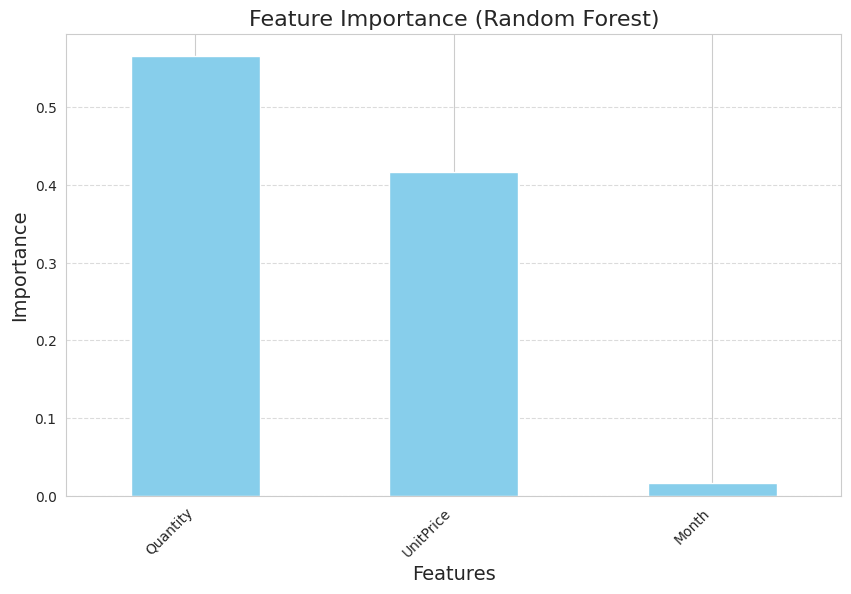

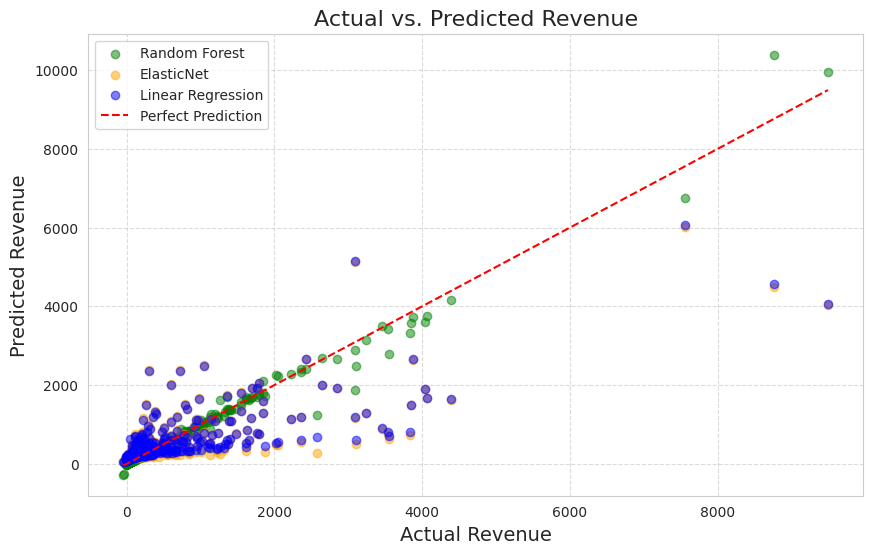

Actual vs. Predicted Revenue Table:
      Actual Revenue  Predicted Revenue (Linear Regression)  \
506           162.25                             187.292909   
1539            0.00                             113.312465   
1912         1475.35                             767.554686   
931            29.85                             214.846846   
2679          157.50                             558.142896   
282            75.75                             174.564786   
414          3545.00                             719.383723   
1173           55.25                             195.008485   
834           232.50                             327.663972   
2083          730.20                             429.485282   

      Predicted Revenue (ElasticNet)  Predicted Revenue (Random Forest)  
506                       198.642100                           157.4225  
1539                      129.242475                             1.4090  
1912                      772.159558            

<ipython-input-16-6e471f7fd739>:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Description', data=top_products, palette='viridis')


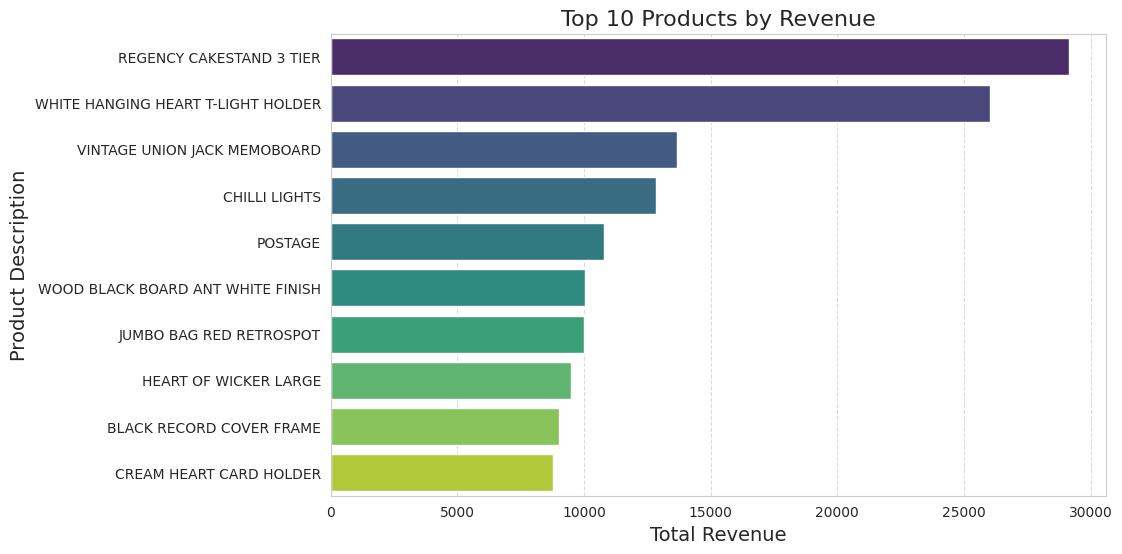

Top 10 Products by Revenue:
                             Description   Revenue
1993            REGENCY CAKESTAND 3 TIER  29141.10
2605  WHITE HANGING HEART T-LIGHT HOLDER  26012.70
2564        VINTAGE UNION JACK MEMOBOARD  13669.28
570                        CHILLI LIGHTS  12831.86
1877                             POSTAGE  10791.95
2638   WOOD BLACK BOARD ANT WHITE FINISH  10051.86
1286             JUMBO BAG RED RETROSPOT  10005.90
1190               HEART OF WICKER LARGE   9492.72
292             BLACK RECORD COVER FRAME   9019.20
678              CREAM HEART CARD HOLDER   8761.18


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Online Retail dataset
file_path = "Online_Retail.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna(subset=['CustomerID', 'Description'])

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create derived features
df['Month'] = df['InvoiceDate'].dt.month  # Use numeric month for modeling
df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Calculate revenue

# Aggregate data by product description
product_data = df.groupby('Description').agg({
    'Quantity': 'sum',        # Total quantity sold for each product
    'Revenue': 'sum',         # Total revenue for each product
    'UnitPrice': 'mean',      # Average unit price for each product
    'Month': 'mean'           # Average month of sales for each product
}).reset_index()

# Define features and target
X = product_data[['Quantity', 'UnitPrice', 'Month']]
y = product_data['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Development
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# ElasticNet Regression with cross-validation
elastic_net = ElasticNetCV(cv=5, random_state=42)
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 3: Model Evaluation
# Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# ElasticNet Regression
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
r2_en = r2_score(y_test, y_pred_en)

# Random Forest Regression
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Step 4: Visualizations and Tables
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# 1. Feature Importance (Random Forest)
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Actual vs. Predicted Revenue Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Random Forest')
plt.scatter(y_test, y_pred_en, alpha=0.5, color='orange', label='ElasticNet')
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Revenue", fontsize=14)
plt.ylabel("Predicted Revenue", fontsize=14)
plt.title("Actual vs. Predicted Revenue", fontsize=16)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# 3. Actual vs. Predicted Revenue Table
results_df = pd.DataFrame({
    'Actual Revenue': y_test,
    'Predicted Revenue (Linear Regression)': y_pred_lr,
    'Predicted Revenue (ElasticNet)': y_pred_en,
    'Predicted Revenue (Random Forest)': y_pred_rf
})
print("Actual vs. Predicted Revenue Table:")
print(results_df.head(10))

# 4. Model Performance Comparison Table
performance_df = pd.DataFrame({
    'Model': ['Linear Regression', 'ElasticNet Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_en, rmse_rf],
    'R²': [r2_lr, r2_en, r2_rf]
})
print("\nModel Performance Comparison Table:")
print(performance_df)

# 5. Top 10 Products by Revenue
top_products = product_data[['Description', 'Revenue']].nlargest(10, 'Revenue')
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='Description', data=top_products, palette='viridis')
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue", fontsize=14)
plt.ylabel("Product Description", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Print top 10 products by revenue
print("Top 10 Products by Revenue:")
print(top_products)


<ipython-input-19-e120fa5ec58a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-19-e120fa5ec58a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month  # Use numeric month for modeling
<ipython-input-19-e120fa5ec58a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

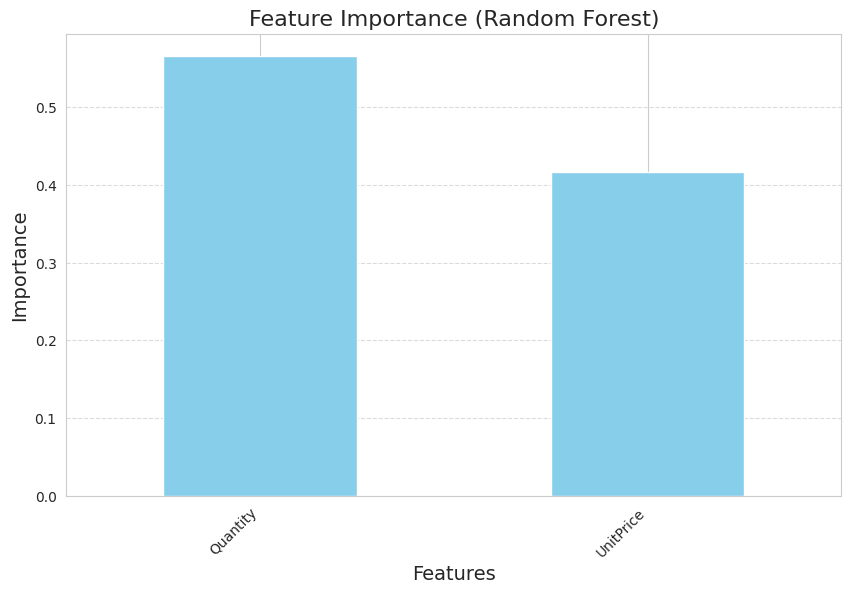

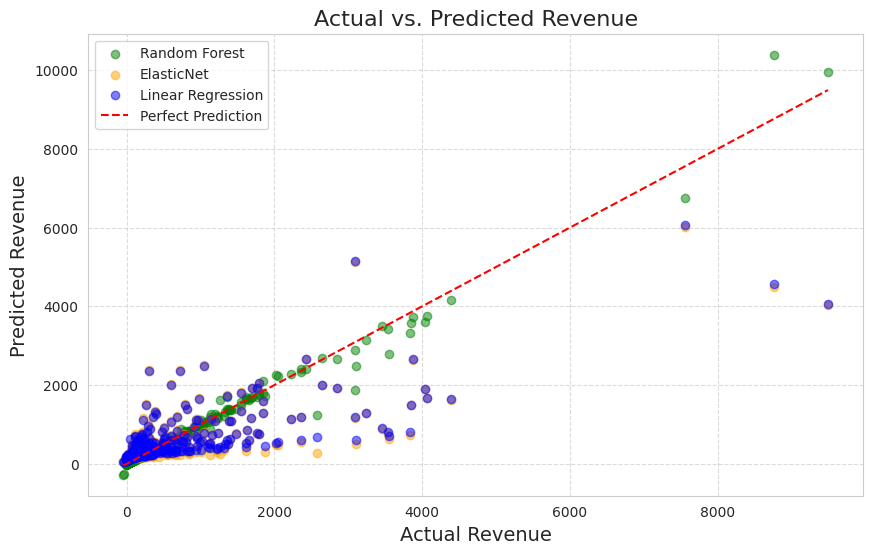

Actual vs. Predicted Revenue Table:
      Actual Revenue  Predicted Revenue (Linear Regression)  \
506           162.25                             187.292909   
1539            0.00                             113.312465   
1912         1475.35                             767.554686   
931            29.85                             214.846846   
2679          157.50                             558.142896   
282            75.75                             174.564786   
414          3545.00                             719.383723   
1173           55.25                             195.008485   
834           232.50                             327.663972   
2083          730.20                             429.485282   

      Predicted Revenue (ElasticNet)  Predicted Revenue (Random Forest)  
506                       198.642100                           157.4225  
1539                      129.242475                             1.4090  
1912                      772.159558            

<ipython-input-19-e120fa5ec58a>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Description', data=top_products, palette='viridis')


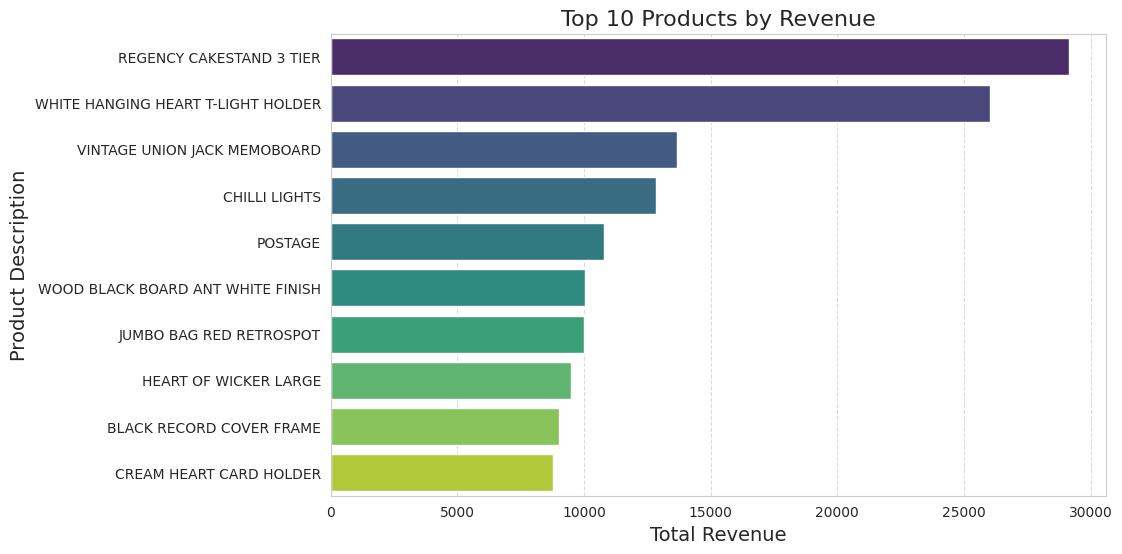

Top 10 Products by Revenue:
                             Description   Revenue
1993            REGENCY CAKESTAND 3 TIER  29141.10
2605  WHITE HANGING HEART T-LIGHT HOLDER  26012.70
2564        VINTAGE UNION JACK MEMOBOARD  13669.28
570                        CHILLI LIGHTS  12831.86
1877                             POSTAGE  10791.95
2638   WOOD BLACK BOARD ANT WHITE FINISH  10051.86
1286             JUMBO BAG RED RETROSPOT  10005.90
1190               HEART OF WICKER LARGE   9492.72
292             BLACK RECORD COVER FRAME   9019.20
678              CREAM HEART CARD HOLDER   8761.18


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Online Retail dataset
file_path = "Online_Retail.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna(subset=['CustomerID', 'Description'])

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create derived features
df['Month'] = df['InvoiceDate'].dt.month  # Use numeric month for modeling
df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Calculate revenue

# Aggregate data by product description
product_data = df.groupby('Description').agg({
    'Quantity': 'sum',        # Total quantity sold for each product
    'Revenue': 'sum',         # Total revenue for each product
    'UnitPrice': 'mean',      # Average unit price for each product
    'Month': 'mean'           # Average month of sales for each product
}).reset_index()

# Define features and target
X = product_data[['Quantity', 'UnitPrice', 'Month']]
y = product_data['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Development
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# ElasticNet Regression with cross-validation
elastic_net = ElasticNetCV(cv=5, random_state=42)
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 3: Model Evaluation
# Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# ElasticNet Regression
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
r2_en = r2_score(y_test, y_pred_en)

# Random Forest Regression
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Step 4: Feature Selection with Random Forest
selector = SelectFromModel(rf, threshold="mean", max_features=3)
selector.fit(X_train, y_train)

# Step 5: Visualizations and Tables
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# 1. Feature Importance (Random Forest) after Feature Selection
plt.figure(figsize=(10, 6))
# Ensure to use the correct subset of features based on the selection mask
selected_features = X.columns[selector.get_support()]
# Adjust the feature importance values to match the selected features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)[selector.get_support()]
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Actual vs. Predicted Revenue Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Random Forest')
plt.scatter(y_test, y_pred_en, alpha=0.5, color='orange', label='ElasticNet')
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Revenue", fontsize=14)
plt.ylabel("Predicted Revenue", fontsize=14)
plt.title("Actual vs. Predicted Revenue", fontsize=16)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# 3. Actual vs. Predicted Revenue Table
results_df = pd.DataFrame({
    'Actual Revenue': y_test,
    'Predicted Revenue (Linear Regression)': y_pred_lr,
    'Predicted Revenue (ElasticNet)': y_pred_en,
    'Predicted Revenue (Random Forest)': y_pred_rf
})
print("Actual vs. Predicted Revenue Table:")
print(results_df.head(10))

# 4. Model Performance Comparison Table
performance_df = pd.DataFrame({
    'Model': ['Linear Regression', 'ElasticNet Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_en, rmse_rf],
    'R²': [r2_lr, r2_en, r2_rf]
})
print("\nModel Performance Comparison Table:")
print(performance_df)

# 5. Top 10 Products by Revenue
top_products = product_data[['Description', 'Revenue']].nlargest(10, 'Revenue')
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='Description', data=top_products, palette='viridis')
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue", fontsize=14)
plt.ylabel("Product Description", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Print top 10 products by revenue
print("Top 10 Products by Revenue:")
print(top_products)


<ipython-input-15-aaaaaf22fe32>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month  # Use numeric month for modeling


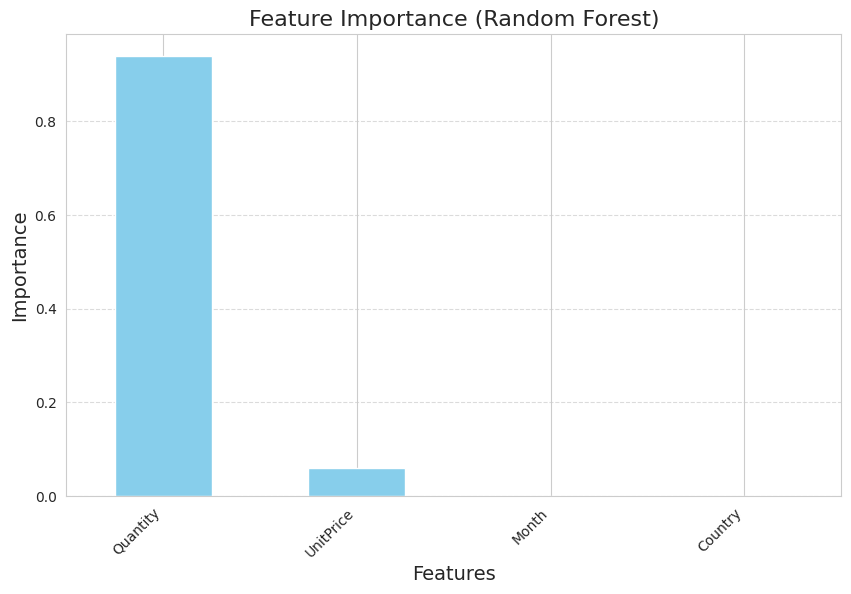

Feature Importance Values (Random Forest):
Quantity     0.939365
UnitPrice    0.059513
Month        0.000821
Country      0.000300
dtype: float64

Revenue Calculation for Linear Regression:
       Actual Revenue  Predicted Revenue (Linear Regression)
41281           19.80                              12.152560
58269            2.10                               9.309631
54225           50.88                              58.197258
71000            4.25                               8.627546
56884           19.50                              20.931969
64858            2.55                              11.772476
36180           19.80                              21.464618
45569           15.60                              16.589214
74631           34.00                              10.378667
25458            3.48                              21.896076

Revenue Calculation for Random Forest:
       Actual Revenue  Predicted Revenue (Random Forest)
41281           19.80                     

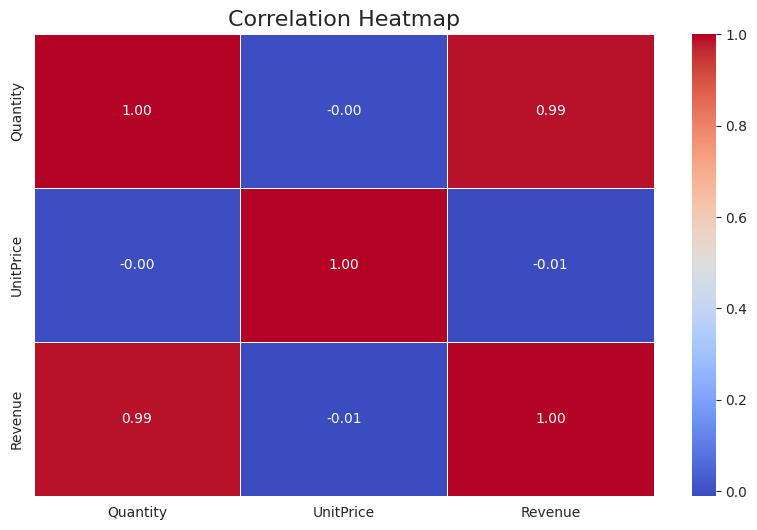

Correlation Matrix:
           Quantity  UnitPrice   Revenue
Quantity   1.000000  -0.003545  0.986928
UnitPrice -0.003545   1.000000 -0.010863
Revenue    0.986928  -0.010863  1.000000


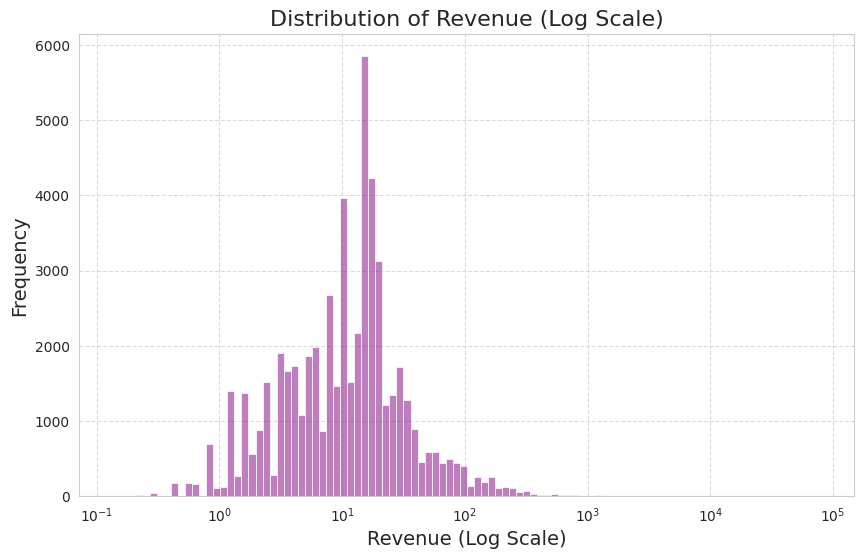

Revenue Summary Statistics:
count    56871.000000
mean        21.079863
std        465.684226
min     -77183.600000
25%          4.250000
50%         10.500000
75%         19.500000
max      77183.600000
Name: Revenue, dtype: float64


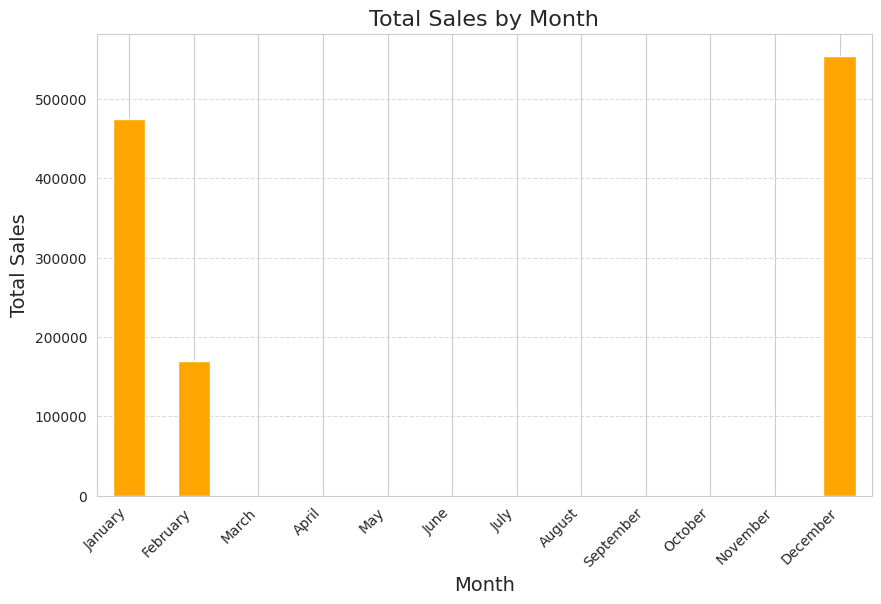

Total Sales by Month:
Month
January      475074.38
February     169154.47
March              NaN
April              NaN
May                NaN
June               NaN
July               NaN
August             NaN
September          NaN
October            NaN
November           NaN
December     554604.02
Name: Revenue, dtype: float64


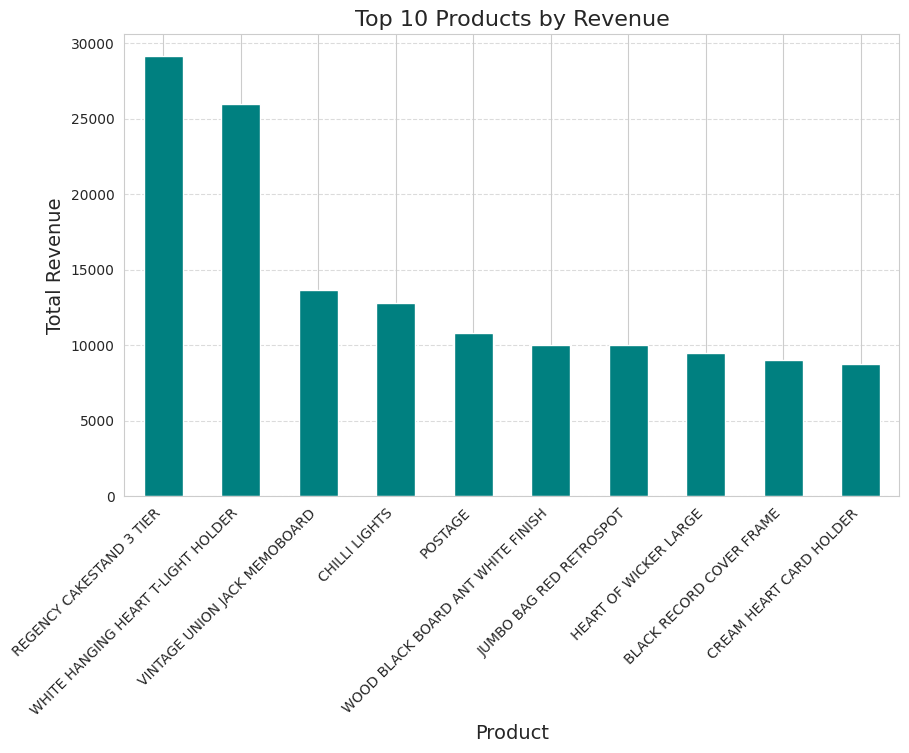

Top 10 Products by Revenue:
Description
REGENCY CAKESTAND 3 TIER              29141.10
WHITE HANGING HEART T-LIGHT HOLDER    26012.70
VINTAGE UNION JACK MEMOBOARD          13669.28
CHILLI LIGHTS                         12831.86
POSTAGE                               10791.95
WOOD BLACK BOARD ANT WHITE FINISH     10051.86
JUMBO BAG RED RETROSPOT               10005.90
HEART OF WICKER LARGE                  9492.72
BLACK RECORD COVER FRAME               9019.20
CREAM HEART CARD HOLDER                8761.18
Name: Revenue, dtype: float64
Column 'Country' not found in the dataset.
Summary Statistics Table:
             count       mean         std      min   25%    50%    75%  \
Quantity   56871.0  11.679116  444.404213 -74215.0  2.00   4.00  12.00   
UnitPrice  56871.0   3.302440   11.101377      0.0  1.25   1.95   3.75   
Revenue    56871.0  21.079863  465.684226 -77183.6  4.25  10.50  19.50   

                max  
Quantity   74215.00  
UnitPrice   1715.85  
Revenue    77183.60  

Model

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

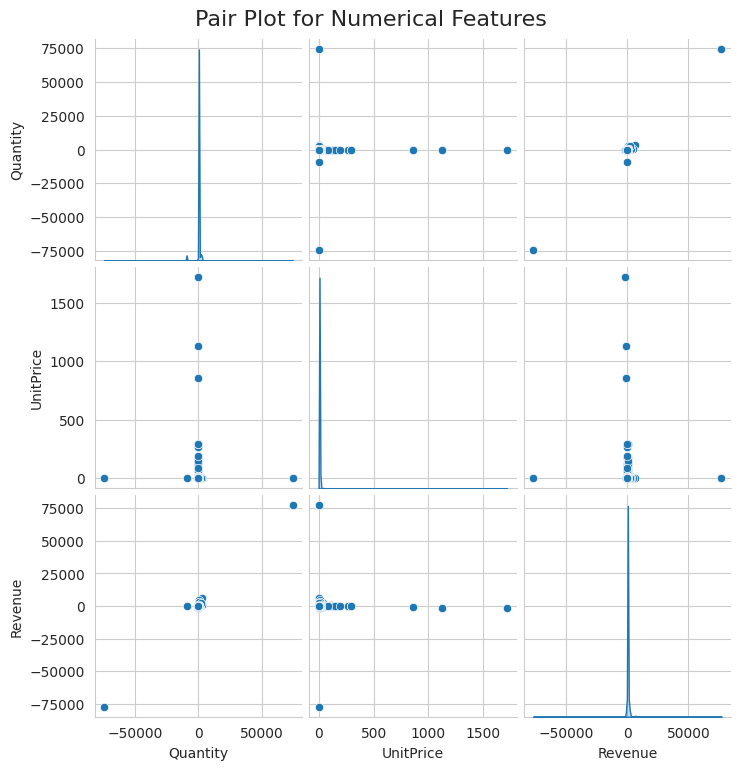

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Online Retail dataset
file_path = "Online_Retail.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Handle missing values
df = df.dropna(subset=['CustomerID', 'Description'])

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create derived features
df['Month'] = df['InvoiceDate'].dt.month_name()  # Extract month names
df['Revenue'] = df['Quantity'] * df['UnitPrice']  # Calculate revenue

# Encode categorical variables
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Define features and target
X = df[['Quantity', 'UnitPrice'] + list(df.filter(like='Country_').columns)]
X['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month  # Use numeric month for modeling
y = df['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Development
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 3: Model Evaluation
# Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Mean Absolute Error for LR

# Random Forest Regression
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)  # Mean Absolute Error for RF

# Step 4: Visualizations and Tables
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# 1. Feature Importance Plot (Random Forest)
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
# Combine all country-related features into a single "Country" feature
feature_importances['Country'] = feature_importances.filter(like='Country_').sum()
feature_importances = feature_importances.drop(feature_importances.filter(like='Country_').index)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print feature importance values
print("Feature Importance Values (Random Forest):")
print(feature_importances.sort_values(ascending=False))

# 2. Revenue Calculation for Each Model
revenue_lr = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue (Linear Regression)': y_pred_lr})
revenue_rf = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue (Random Forest)': y_pred_rf})

# Print revenue comparisons for both models
print("\nRevenue Calculation for Linear Regression:")
print(revenue_lr.head(10))

print("\nRevenue Calculation for Random Forest:")
print(revenue_rf.head(10))

# 3. Actual vs. Predicted Revenue Table
revenue_comparison_df = pd.DataFrame({
    'Actual Revenue': y_test,
    'Predicted Revenue (Random Forest)': y_pred_rf,
    'Predicted Revenue (Linear Regression)': y_pred_lr
})
print("Actual vs. Predicted Revenue Table:")
print(revenue_comparison_df.head(10))

# 4. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[['Quantity', 'UnitPrice', 'Revenue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Print correlation values
print("Correlation Matrix:")
print(corr_matrix)

# 5. Distribution of Revenue (Improved)
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], bins=100, color='purple', kde=True, log_scale=True)
plt.title("Distribution of Revenue (Log Scale)", fontsize=16)
plt.xlabel("Revenue (Log Scale)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Print summary statistics for Revenue
print("Revenue Summary Statistics:")
print(df['Revenue'].describe())

# 6. Sales by Month (with Month Names)
monthly_sales = df.groupby('Month')['Revenue'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='orange')
plt.title("Total Sales by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print monthly sales values
print("Total Sales by Month:")
print(monthly_sales)

# 7. Top 10 Products by Revenue
top_products = df.groupby('Description')['Revenue'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='teal')
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Product", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print top 10 products by revenue
print("Top 10 Products by Revenue:")
print(top_products)

# 8. Sales by Country (Fixed KeyError)
if 'Country' in df.columns:
    country_sales = df.groupby('Country')['Revenue'].sum().nlargest(10)
    plt.figure(figsize=(10, 6))
    country_sales.plot(kind='bar', color='coral')
    plt.title("Total Sales by Country (Top 10)", fontsize=16)
    plt.xlabel("Country", fontsize=14)
    plt.ylabel("Total Sales", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    # Print top 10 countries by sales
    print("Total Sales by Country (Top 10):")
    print(country_sales)
else:
    print("Column 'Country' not found in the dataset.")

# 9. Summary Statistics Table
summary_stats = df[['Quantity', 'UnitPrice', 'Revenue']].describe().T
print("Summary Statistics Table:")
print(summary_stats)

# 10. Model Performance Comparison Table
performance_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_rf],
    'R²': [r2_lr, r2_rf],
    'MAE': [mae_lr, mae_rf]  # Mean Absolute Error added to the comparison
})
print("\nModel Performance Comparison Table:")
print(performance_df)

# 11. Pair Plot for Numerical Features
sns.pairplot(df[['Quantity', 'UnitPrice', 'Revenue']], diag_kind='kde', palette='viridis')
plt.suptitle("Pair Plot for Numerical Features", y=1.02, fontsize=16)
plt.show()
